In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:20<00:00, 66.7MB/s]
100% 1.06G/1.06G [00:20<00:00, 56.8MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
#Generators -create batches
train_ds=keras.utils.image_dataset_from_directory(directory='/content/train',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256))
validation_ds=keras.utils.image_dataset_from_directory(directory='/content/test',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [6]:
#creating cnn model
model=Sequential()
#convolution layer
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(256,256,3),activation='relu',padding='valid'))
#pooling layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#pooling layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#pooling layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#flattening layer
model.add(Flatten())
#dense layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=1,validation_data=validation_ds)

625/625 ━━━━━━━━━━━━━━━━━━━━ 5623s 9s/step - accuracy: 0.5580 - loss: 2.6114 - val_accuracy: 0.5568 - val_loss: 0.7163


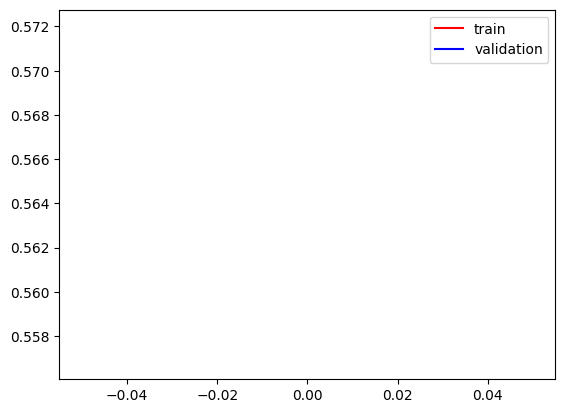

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

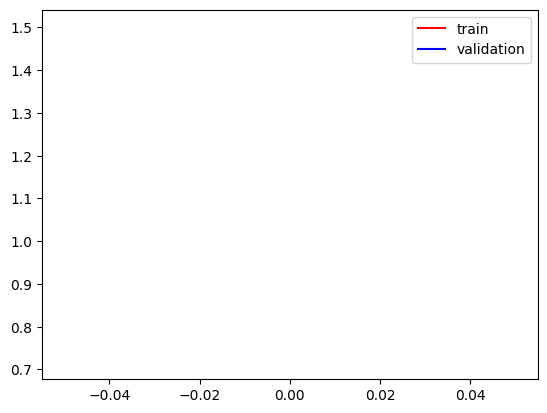

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
#reduce complexity
import cv2

In [23]:
test_imag=cv2.imread('/content/cat.jpg')

cat.jpg  dogs_vs_cats  dogs-vs-cats.zip  sample_data  test  train


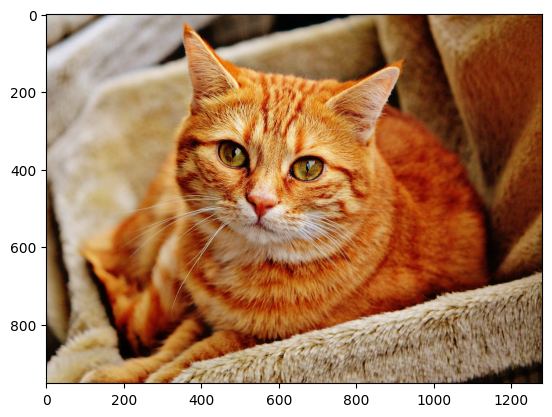

In [24]:
import cv2
import matplotlib.pyplot as plt

# Verify the file path
!ls /content/

# Load the image, handling potential errors
test_imag = cv2.imread('/content/cat.jpg')
if test_imag is None:
    print("Error: Failed to load image. Check the file path and ensure the image is not corrupted.")
else:
    # Display the image
    plt.imshow(cv2.cvtColor(test_imag, cv2.COLOR_BGR2RGB)) # Convert from BGR (OpenCV default) to RGB (Matplotlib expects)
    plt.show()

cat.jpg  dogs_vs_cats  dogs-vs-cats.zip  sample_data  test  train


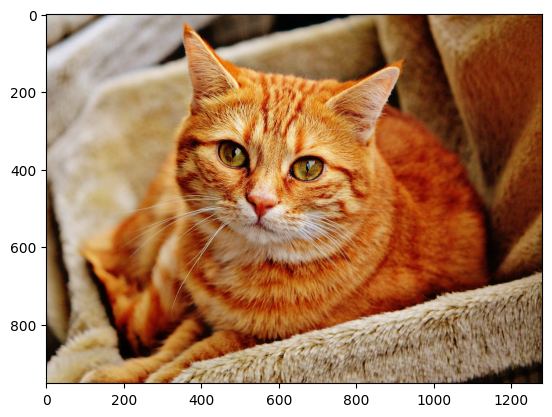

(952, 1280, 3)


In [25]:
import cv2
import matplotlib.pyplot as plt

# Verify the file path
!ls /content/

# Load the image, handling potential errors
test_imag = cv2.imread('/content/cat.jpg')
if test_imag is None:
    print("Error: Failed to load image. Check the file path and ensure the image is not corrupted.")
else:
    # Display the image
    plt.imshow(cv2.cvtColor(test_imag, cv2.COLOR_BGR2RGB)) # Convert from BGR (OpenCV default) to RGB (Matplotlib expects)
    plt.show()

    # Now that we know the image loaded correctly, we can check the shape
    print(test_imag.shape)

In [26]:
test_imag=cv2.resize(test_imag,(256,256))

In [27]:
test_input = test_imag.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


array([[0.]], dtype=float32)